In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Data cleaning
# EDA
# Text preprocessing
# Model building
# Evaluation
# Improvements
# Deploy

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping last 3 columns as it does not contian any value or very least values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.sample(5)

,v1,v2
588,ham,Ya srsly better than yi tho
205,ham,ÌÏ say until like dat i dun buy ericsson oso c...
1949,ham,Wait 2 min..stand at bus stop
4949,ham,Hi its me you are probably having too much fun...
1106,ham,"Good afternoon, my love. How goes your day ? W..."


In [9]:
# Renaming the columns as they are not descriptive
df.rename(columns={'v1':'Target','v2':'Text'},inplace = True)
df.sample(5)

,Target,Text
4679,ham,"That's cool he'll be here all night, lemme kno..."
4103,ham,Do u hav any frnd by name ashwini in ur college?
405,ham,"Haha get used to driving to usf man, I know a ..."
4258,ham,Sad story of a Man - Last week was my b'day. M...
2400,ham,Hi! This is Roger from CL. How are you?


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['Target'])
# ham = 0
# spam = 1

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
# Fitting in our data
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.sample(5)

,Target,Text
4232,0,My love ... I hope your not doing anything dra...
1380,0,i dnt wnt to tlk wid u
2982,0,What should i eat fo lunch senor
4950,0,hi baby im sat on the bloody bus at the mo and...
2642,0,"They can try! They can get lost, in fact. Tee hee"


In [15]:
# Checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
# Check duplicate values
df.duplicated().sum()

np.int64(403)

In [17]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

# EDA

In [20]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# checking how many spam and ham are present in datq
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [22]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

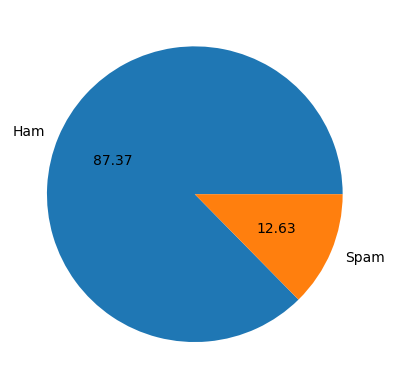

In [23]:
plt.pie(df['Target'].value_counts(),labels = ['Ham','Spam'], autopct='%0.2f')
plt.show

In [24]:
# Data is imbalanced because ham and spam are not balanced

In [25]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\AJAY
[nltk_data]     BANGAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# num of characters
df['num_of_chars'] = df['Text'].apply(len)

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_15152\804689720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_chars'] = df['Text'].apply(len)


In [29]:
df.sample(5)

,Target,Text,num_of_chars
4244,0,Is toshiba portege m100 gd?,27
4701,0,Anytime...,10
4147,1,Please call Amanda with regard to renewing or ...,160
3656,0,Studying. But i.ll be free next weekend.,40
951,0,Shb b ok lor... Thanx...,24


In [30]:
# num of words
df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_15152\2464149275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [31]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\AJAY
[nltk_data]     BANGAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
df.sample(5)

,Target,Text,num_of_chars,num_of_words
938,1,Urgent! call 09061749602 from Landline. Your c...,149,28
1376,0,Auntie huai juan never pick up her phone,40,8
3448,0,Sorry. || mail? ||,19,6
3025,0,I finished my lunch already. U wake up already?,47,11
1006,1,Panasonic & BluetoothHdset FREE. Nokia FREE. M...,150,25


In [33]:
# Number of sentences
df['num_of_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_15152\3145350066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sent'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [34]:
df.sample(5)

,Target,Text,num_of_chars,num_of_words,num_of_sent
3855,0,I'm ok. Will do my part tomorrow,32,8,1
688,0,Thanks love. But am i doing torch or bold.,42,11,2
4866,0,Okey dokey swashbuckling stuff what oh.,39,7,1
1783,0,No dear i do have free messages without any re...,62,14,2
3145,0,\SHIT BABE.. THASA BIT MESSED UP.YEH,36,7,1


In [35]:
# we can aslo say that now we have created new features based on our data

In [36]:
df[['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# analyzing ham and spam separatly

In [38]:
# ham
df[df['Target'] == 0][['num_of_chars','num_of_words','num_of_sent']].describe() 

,num_of_chars,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# Spam
df[df['Target'] == 1][['num_of_chars','num_of_words','num_of_sent']].describe() 

,num_of_chars,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
# Plotting histogram for both spam and ham

In [41]:
import seaborn as sns

<Axes: xlabel='num_of_chars', ylabel='Count'>

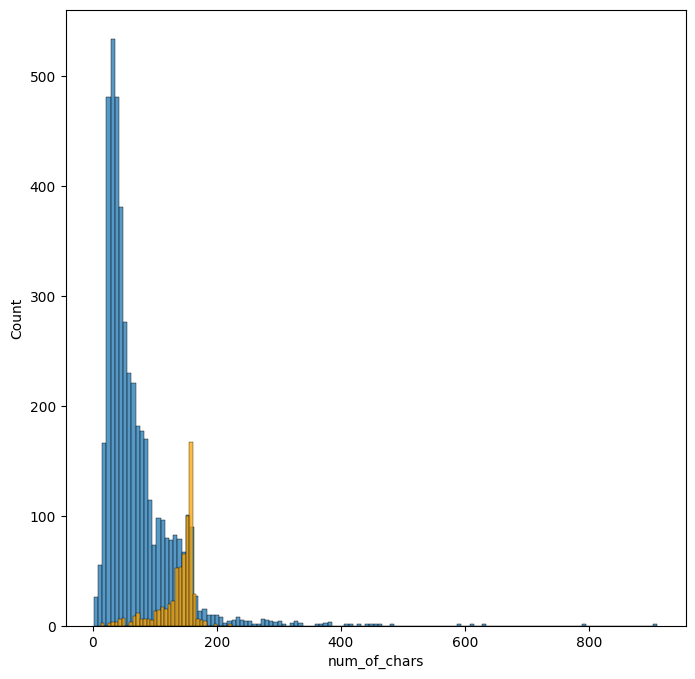

In [42]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['Target'] == 0]['num_of_chars'])
sns.histplot(df[df['Target'] == 1]['num_of_chars'],color = 'Orange')

<Axes: xlabel='num_of_words', ylabel='Count'>

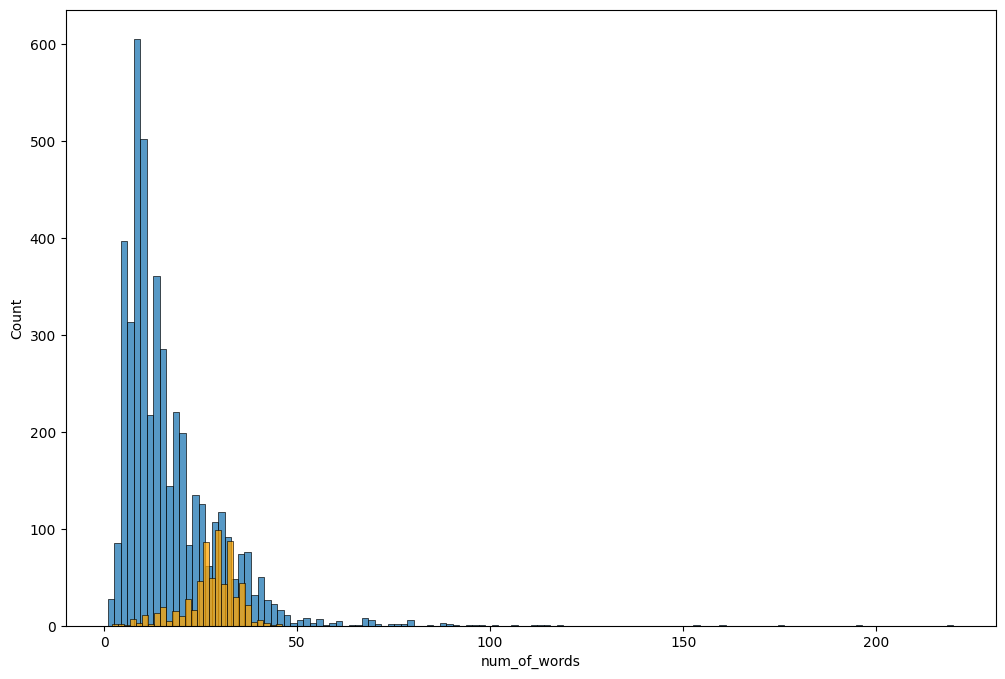

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target'] == 0]['num_of_words'])
sns.histplot(df[df['Target'] == 1]['num_of_words'],color = 'Orange')
# ham = 0
# spam = 1

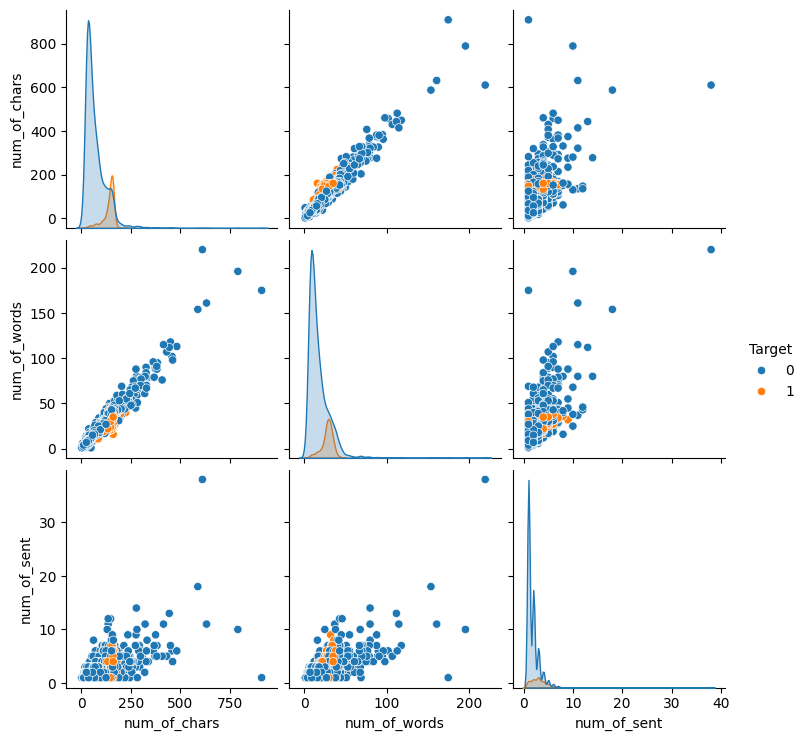

In [44]:
sns.pairplot(df,hue='Target')

In [45]:
df[['Target','num_of_chars','num_of_words','num_of_sent']].corr()

,Target,num_of_chars,num_of_words,num_of_sent
Target,1.000000,0.384717,0.262912,0.263939
num_of_chars,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_of_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

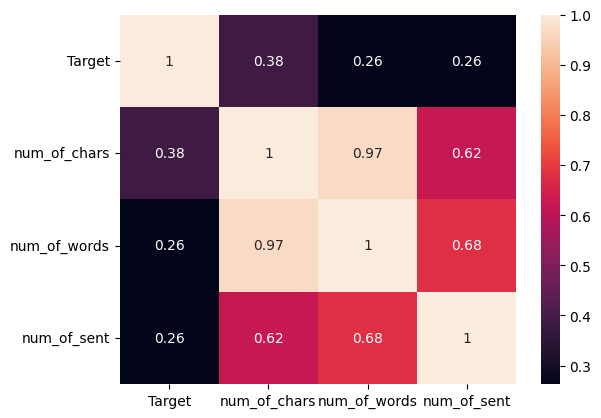

In [46]:
sns.heatmap(df[['Target','num_of_chars','num_of_words','num_of_sent']].corr(),annot=True)

# Data Preprocessing
##### - Lower case
##### - Tokenization
##### - Removing Special Chars
##### - Removing stop words and punctuation
##### - Stemming

In [47]:
def transform_text(text):
    text = text.lower()
    return text

In [48]:
transform_text('HI HOW ARE YOU')

'hi how are you'

In [49]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text

In [50]:
transform_text('HI HOW ARE YOU')

['hi', 'how', 'are', 'you']

In [51]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # is aplha numeric
            y.append(i)
            
    return y

In [52]:
transform_text('HI HOW ARE YOU %%')

['hi', 'how', 'are', 'you']

In [53]:
from nltk.corpus import stopwords

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AJAY
[nltk_data]     BANGAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
import string

In [57]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # is aplha numeric
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [59]:
transform_text('HI HOW ARE YOU %% ?a ajay ')

['hi', 'ajay']

In [60]:
transform_text('did you like my presentation on ml ?')

['like', 'presentation', 'ml']

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [62]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum(): # is aplha numeric
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)

In [63]:
transform_text('I loved the YT lecture on ML, How about you ?')

'love yt lectur ml'

In [64]:
df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [65]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [66]:
df['Transformed_text'] = df['Text'].apply(transform_text)

C:\Users\AJAY BANGAR\AppData\Local\Temp\ipykernel_15152\1235748540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(transform_text)


In [67]:
df.head()

,Target,Text,num_of_chars,num_of_words,num_of_sent,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
# creating wordcloud

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [71]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=' '))

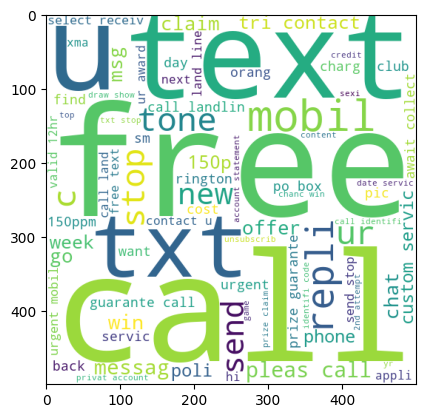

In [72]:
plt.imshow(spam_wc)

In [73]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_text'].str.cat(sep=' '))

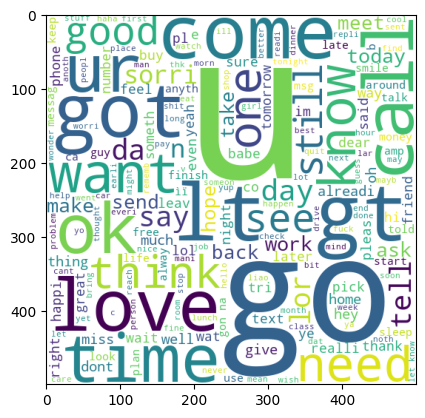

In [74]:
plt.imshow(ham_wc)

In [75]:
# Top 30 words of spam and ham

In [76]:
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [77]:
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [78]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [79]:
len(spam_corpus)

9939

In [80]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [81]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


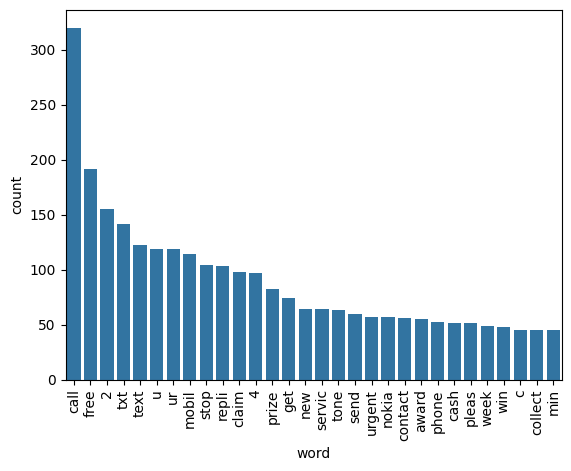

In [82]:
# most commonly used 30 words
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='word', y='count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

In [83]:
ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [84]:
len(ham_corpus)

35404

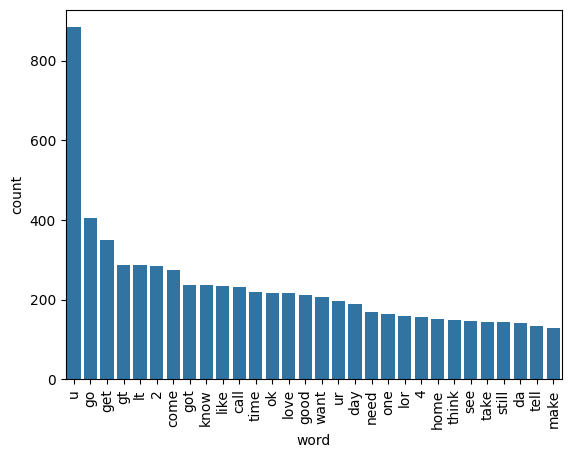

In [85]:
# most commonly used 30 words
common_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='word', y='count')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

# Building Model

In [86]:
# firstly using navi bias algorithm

In [87]:
# vectorizing our data

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
cv = CountVectorizer()

In [90]:
X = cv.fit_transform(df['Transformed_text']).toarray()

In [91]:
X.shape

(5169, 6708)

In [92]:
y = df['Target'].values

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [95]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [96]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
# gausian navie b - used when the feature ( indepent variable ) are continous and are assumed to follw a normal curve
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [98]:
# it is suitable for binary/ boolean features
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [99]:
# we have selected bnb as it has high precision score

In [100]:
import pickle
pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))